In [310]:
df = pd.read_csv(r"D:\PG-DAI\MachineLearning\Dec 29 & 30 TimeSeries\Train.csv")
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [311]:
## Cleaning up the data
df.columns=["ID","DateTime","Count"]
del df["ID"]
df.head()

,DateTime,Count
0,25-08-2012 00:00,8
1,25-08-2012 01:00,2
2,25-08-2012 02:00,6
3,25-08-2012 03:00,2
4,25-08-2012 04:00,2


In [312]:
df.DateTime = pd.to_datetime(df.DateTime,format='%d-%m-%Y %H:%M')
df.index = df.DateTime
df = df.resample('D').mean() 

In [313]:
# ## Drop last 2 rows
# df.drop(106,axis=0,inplace=True)
# df.drop(105,axis=0,inplace=True)

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 762 entries, 2012-08-25 to 2014-09-25
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Count   762 non-null    float64
dtypes: float64(1)
memory usage: 11.9 KB


In [315]:
# # Convert DateTime into Datetime
# df['DateTime']=pd.to_datetime(df['DateTime'])
# df.info()

In [316]:
# df.set_index('DateTime',inplace=True)
# df.head()

In [317]:
df.describe()

,Count
count,762.000000
mean,138.958115
std,135.911437
min,2.416667
25%,24.250000
50%,99.125000
75%,215.958333
max,702.333333


<AxesSubplot:xlabel='DateTime'>

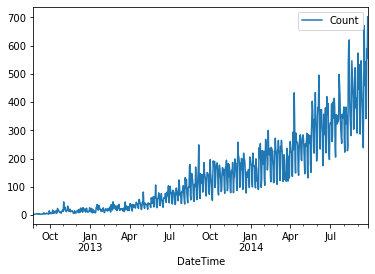

In [318]:
df.plot()

## Moving Average

#### This method removes the underlying trend in the time series also known as Detrending

In [319]:
# SMA over a period of 2 and 12 DateTime 
#min_period = min value to start calculation

df['SMA_2'] = df.Count.rolling(2, min_periods=1).mean()
df['SMA_12'] = df.Count.rolling(12, min_periods=1).mean()
df.head(20)

,Count,SMA_2,SMA_12
DateTime,,,
2012-08-25,3.166667,3.166667,3.166667
2012-08-26,3.666667,3.416667,3.416667
2012-08-27,2.583333,3.125000,3.138889
2012-08-28,2.416667,2.500000,2.958333
2012-08-29,2.500000,2.458333,2.866667
2012-08-30,3.083333,2.791667,2.902778
2012-08-31,3.250000,3.166667,2.952381
2012-09-01,4.666667,3.958333,3.166667
2012-09-02,4.916667,4.791667,3.361111


<AxesSubplot:xlabel='DateTime'>

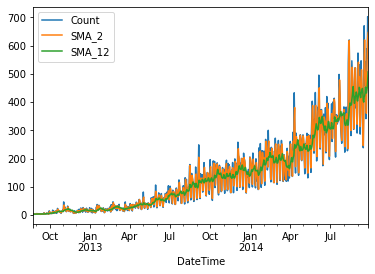

In [320]:
df.plot()

In [321]:
df['CMA']= df.Count.expanding(min_periods=1).mean()  # cummulative moving average the cumulative moving average considers all of the preceding values when calculating the average.
df.head(15)

,Count,SMA_2,SMA_12,CMA
DateTime,,,,
2012-08-25,3.166667,3.166667,3.166667,3.166667
2012-08-26,3.666667,3.416667,3.416667,3.416667
2012-08-27,2.583333,3.125000,3.138889,3.138889
2012-08-28,2.416667,2.500000,2.958333,2.958333
2012-08-29,2.500000,2.458333,2.866667,2.866667
2012-08-30,3.083333,2.791667,2.902778,2.902778
2012-08-31,3.250000,3.166667,2.952381,2.952381
2012-09-01,4.666667,3.958333,3.166667,3.166667
2012-09-02,4.916667,4.791667,3.361111,3.361111


<AxesSubplot:xlabel='DateTime'>

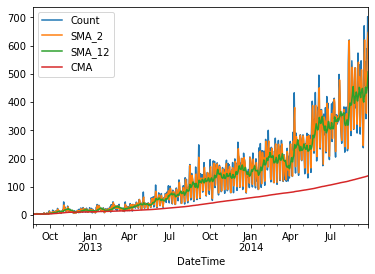

In [322]:
df.plot()

## Exponential Moving Average

In [323]:
# EMA Count
#Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data (0,1)
# Let's smoothing factor - 0.1
df['EMA_0.1'] = df.Count.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df['EMA_0.3'] = df.Count.ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot:xlabel='DateTime'>

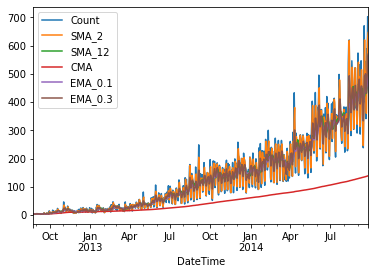

In [324]:
df.plot()

# Check for Stationarity
#### Two common methods to check for stationarity are Visualization and the Augmented Dickey-Fuller (ADF) Test. Python makes both approaches easy:

In [325]:
# Rolling Statistics or Visualization

rolmean = df.Count.rolling(window=12).mean()
rolstd = df.Count.rolling(window=12).std()

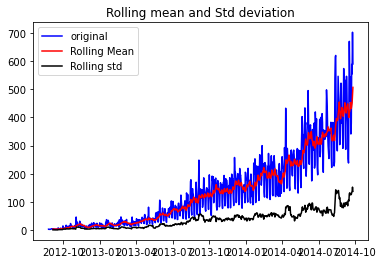

In [326]:
orig = plt.plot(df.Count,color='blue',label='original')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [327]:
### Testing For Stationarity using Dickey-fuller test

from statsmodels.tsa.stattools import adfuller

In [328]:
test_result=adfuller(df['Count'])
test_result  # 'ADF Test Statistic','p-value','#Lags Used','Number of Observations Used'

(2.986350959013852,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '5%': -2.8654483492874236,
  '10%': -2.5688512291811225},
 7212.068059584322)

In [329]:
#Ho: It is not stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    #print(result)
    labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")

In [330]:
adfuller_test(df['Count'])

ADF Test Statistic : 2.986350959013852
p-value : 1.0
Lags Used : 20
Number of Observations Used : 741
weak evidence against null hypothesis, indicating it is non-stationary 


# Converting Non- stationary into stationary

### Detrending
This method removes the underlying trend in the time series:

In [331]:
# Detrending
df_detrend =  (df['Count'] - df['Count'].rolling(window=21).mean())/df['Count'].rolling(window=21).std()

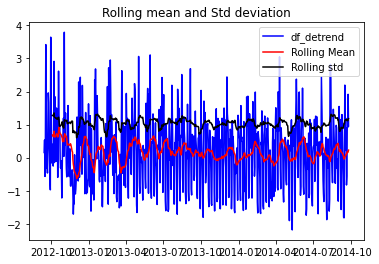

In [332]:
# Rolling Statistics or Visualization

rolmean = df_detrend.rolling(window=21).mean()
rolstd = df_detrend.rolling(window=21).std()

orig = plt.plot(df_detrend,color='blue',label='df_detrend')
mean = plt.plot(rolmean,color='red',label='Rolling Mean')
std = plt.plot(rolstd,color='black',label='Rolling std')
plt.legend()
plt.title('Rolling mean and Std deviation')
plt.show()

In [333]:
df_detrend = df_detrend.dropna()

In [334]:
#ad fuller test
adfuller_test(df_detrend.dropna())


ADF Test Statistic : -6.858601721956723
p-value : 1.6241878203855054e-09
Lags Used : 20
Number of Observations Used : 721
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [335]:
df_detrend

DateTime
2012-09-14    0.155035
2012-09-15    0.532111
2012-09-16   -0.568583
2012-09-17    0.509060
2012-09-18    3.420736
                ...   
2014-09-21   -0.556363
2014-09-22    1.192368
2014-09-23    0.917834
2014-09-24    1.915742
2014-09-25    0.957778
Freq: D, Name: Count, Length: 742, dtype: float64

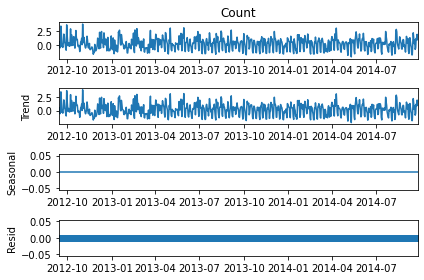

In [336]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_detrend,model='additive',period=1)
decompose_result.plot()
plt.show()

### Differencing
This method removes the underlying seasonal or cyclical patterns in the time series. Since the sample dataset has a 12-DateTime seasonality, I used a 12-lag difference:

In [337]:
# df['Seasonal_Difference']=df['Count']-df['Count'].shift(21)

In [338]:
# df.head(15)

In [339]:
# # Again test dickey fuller test
# adfuller_test(df['Seasonal_Difference'].dropna())

In [340]:
# # Rolling Statistics

# rolmean = df['Seasonal_Difference'].rolling(window=21).mean()
# rolstd = df['Seasonal_Difference'].rolling(window=21).std()
# #orig = plt.plot(df.Count,color='yellow',label='original')
# Seasonal_Difference = plt.plot(df['Seasonal_Difference'],color='blue',label='Seasonal_Difference')
# mean = plt.plot(rolmean,color='red',label='Rolling Mean')
# std = plt.plot(rolstd,color='black',label='Rolling std')
# plt.legend()
# plt.title('Rolling mean and Std deviation')
# plt.show()

# Forcasting on Stationary dataset

In [341]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# df = df.dropna()
# decompose_result = seasonal_decompose(df['Seasonal_Difference'],model='additive',period=1)
# decompose_result.plot()
# plt.show()

In [342]:
# S_df= df['Seasonal_Difference']
# n_df = pd.DataFrame(S_df.T)
# n_df.dropna(inplace=True)

In [343]:
df

,Count,SMA_2,SMA_12,CMA,EMA_0.1,EMA_0.3
DateTime,,,,,,
2012-08-25,3.166667,3.166667,3.166667,3.166667,3.166667,3.166667
2012-08-26,3.666667,3.416667,3.416667,3.416667,3.216667,3.316667
2012-08-27,2.583333,3.125000,3.138889,3.138889,3.153333,3.096667
2012-08-28,2.416667,2.500000,2.958333,2.958333,3.079667,2.892667
2012-08-29,2.500000,2.458333,2.866667,2.866667,3.021700,2.774867
...,...,...,...,...,...,...
2014-09-21,379.250000,360.166667,431.750000,136.479661,434.678741,430.384255
2014-09-22,588.166667,483.708333,440.513889,137.074769,450.027534,477.718978
2014-09-23,554.333333,571.250000,451.361111,137.623794,460.458114,500.703285


#### Set the y_to_train, y_to_test, and the length of predict units

In [344]:
n_df = df_detrend
y_to_train = n_df.iloc[:600] # dataset to train
y_to_test = n_df.iloc[600:] # last X DateTimes for test  
predict_date = len(n_df) - len(y_to_train)  #lenght of dataset - len of training dataset

In [345]:
y_to_train

DateTime
2012-09-14    0.155035
2012-09-15    0.532111
2012-09-16   -0.568583
2012-09-17    0.509060
2012-09-18    3.420736
                ...   
2014-05-02    0.037836
2014-05-03   -1.052706
2014-05-04   -1.906897
2014-05-05    0.372087
2014-05-06    0.210462
Freq: D, Name: Count, Length: 600, dtype: float64

In [346]:
df_detrend

DateTime
2012-09-14    0.155035
2012-09-15    0.532111
2012-09-16   -0.568583
2012-09-17    0.509060
2012-09-18    3.420736
                ...   
2014-09-21   -0.556363
2014-09-22    1.192368
2014-09-23    0.917834
2014-09-24    1.915742
2014-09-25    0.957778
Freq: D, Name: Count, Length: 742, dtype: float64

## Exponential Moving Average

In [347]:
from statsmodels.tsa.api import SimpleExpSmoothing 

5.097025356091619e-07


<function matplotlib.pyplot.show(close=None, block=None)>

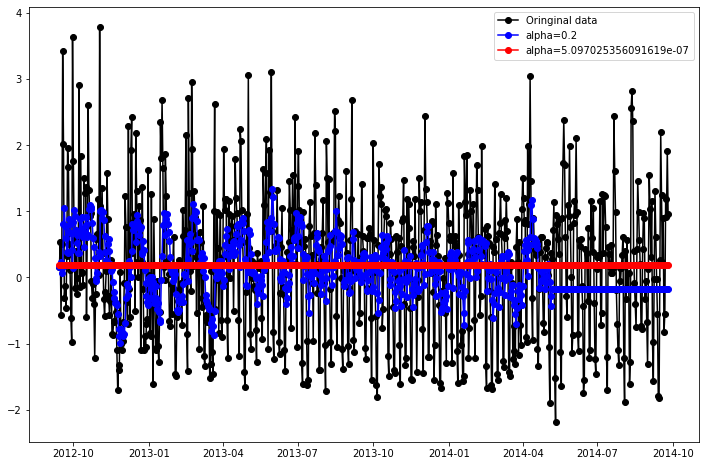

In [348]:
fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(predict_date)

fit2 = SimpleExpSmoothing(y_to_train).fit() 
#statsmodels to automatically find an optimized alpha value for us.
fcast2 = fit2.forecast(predict_date)

alpha = fit2.params["smoothing_level"]
print(alpha)

plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='alpha=0.2')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha}')

plt.legend()
plt.show

In [349]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

700.2791231624221
667.7327009093299


## Holt’s Linear Trend Method

Suitable for time series data with a trend component but without a seasonal component

In [350]:
from statsmodels.tsa.api import Holt

0.13863175838464226
0.1


C:\Users\GOD'SF~1\AppData\Local\Temp/ipykernel_2084/541267126.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(y_to_train).fit(smoothing_level=1, smoothing_slope=0.1, optimized=False)  #smoothing_trend
C:\Users\GOD'SF~1\AppData\Local\Temp/ipykernel_2084/541267126.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(y_to_train).fit(smoothing_slope=0.1, optimized=True)


<function matplotlib.pyplot.show(close=None, block=None)>

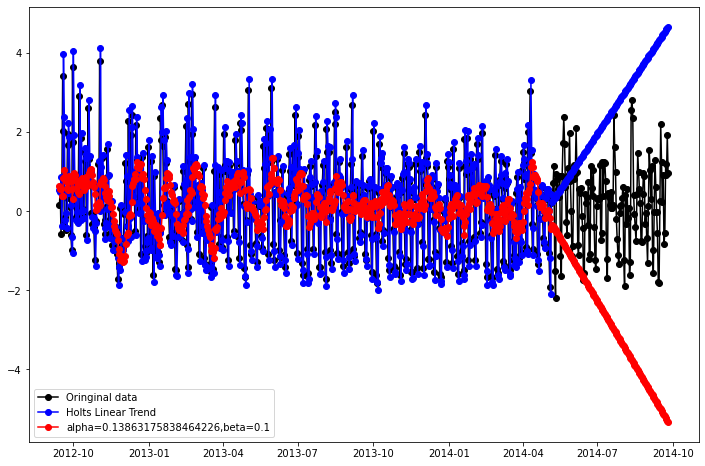

In [351]:
fit1 = Holt(y_to_train).fit(smoothing_level=1, smoothing_slope=0.1, optimized=False)  #smoothing_trend
fcast1 = fit1.forecast(predict_date)

fit2 = Holt(y_to_train).fit(smoothing_slope=0.1, optimized=True)
fcast2 = fit2.forecast(predict_date)
            
           
alpha = fit2.params["smoothing_level"]
print(alpha)
beta = fit2.params["smoothing_trend"]
print(beta)            
            
            
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Oringinal data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='Holts Linear Trend')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="red",label=f'alpha={alpha},beta={beta}')

plt.legend()
plt.show

In [352]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

944.6269398360666
749.7053031436049


## Holt-Winters’ Seasonal Method
Suitable for time series data with trend and/or seasonal components

In [353]:
from statsmodels.tsa.api import ExponentialSmoothing

<function matplotlib.pyplot.show(close=None, block=None)>

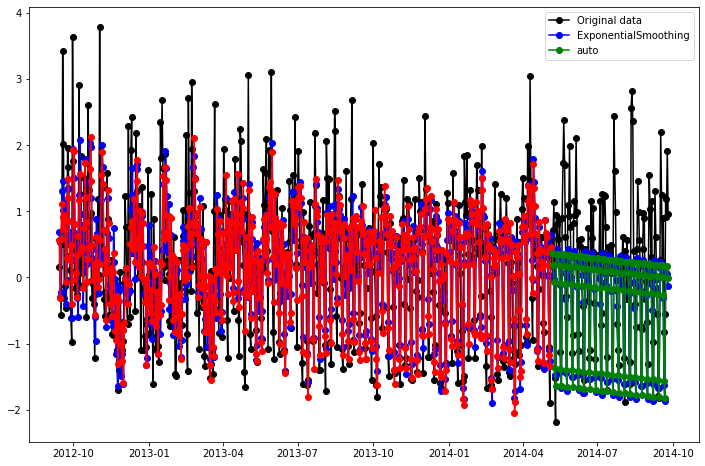

In [354]:
fit1 = ExponentialSmoothing(y_to_train,seasonal_periods = 21, trend='add', seasonal='add').fit()
fcast1 = fit1.forecast(predict_date)

fit2 = ExponentialSmoothing(y_to_train, trend='add', seasonal='add').fit()  # use_boxcox=True
fcast2 = fit2.forecast(predict_date)            
            
plt.figure(figsize=(12, 8))
plt.plot(n_df, marker="o", color="black",label='Original data')

plt.plot(fit1.fittedvalues, marker="o", color="blue")
line1 = plt.plot(fcast1, marker="o", color="blue",label='ExponentialSmoothing')

plt.plot(fit2.fittedvalues, marker="o", color="red")
line2 = plt.plot(fcast2, marker="o", color="green",label='auto')

plt.legend()
plt.show

In [355]:
#square sum error
sse1 =fit1.sse
print(sse1)
sse2 =fit2.sse
print(sse2)

389.81182537250345
362.9432107523461


In [356]:
389.81182537250345
362.9432107523461

362.9432107523461